<div style="text-align: center;">
    <h1 style="
        background: linear-gradient(135deg, #0071dbff, #87c5ffff);
        color: white; 
        padding: 15px 30px; 
        border-radius: 500px; 
        font-family: 'Segoe UI', Arial, sans-serif; 
        box-shadow: 0 4px 15px rgba(0,0,0,0.3);
        display: inline-block;
    ">
       Titanic Survival Prediction using Random Forest Classifier
    </h1>
</div>


<h4 style="color:#0082fcff">1. Importing Required Libraries for Data Analysis, Visualization (Matplotlib/Seaborn), Preprocessing (StandardScaler), and Classification (RandomForestClassifier)</h4>
<p>Brings in pandas/NumPy for data handling, Matplotlib/Seaborn for plots, and scikit-learn tools for splitting data, scaling, metrics, and Random Forest modeling.</p>

In [131]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 200)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 

<h4 style="color:#0082fcff">2. Loading Titanic Dataset from CSV File into a Pandas DataFrame</h4>
<p>Reads the CSV from the specified local path using <code>pd.read_csv()</code> and stores it in <code>titanic_data</code> for subsequent processing.</p>

In [132]:
titanic_data=pd.read_csv(r"C:\Users\Rammah\OneDrive\Desktop\اجازه ان شاء الله\GTC-ML-internship\Day 03\Data\titanic.csv")

<h4 style="color:#0082fcff">3. Displaying Dataset Dimensions and Previewing the First Few Rows</h4>
<p>Prints <code>titanic_data.shape</code> to show (rows, columns), then uses <code>.head()</code> to quickly inspect sample entries and column ordering.</p>

In [133]:
print(titanic_data.shape)
print('---------')
titanic_data.head()


(891, 12)
---------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h4 style="color:#0082fcff">4. Displaying Dataset Information Including Columns, Data Types, and Non-Null Counts</h4>
<p>Uses <code>titanic_data.info()</code> to list column names, dtypes, non-null counts, and memory usage—useful for spotting type issues or missing data.</p>

In [134]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h4 style="color:#0082fcff">5. Generating Statistical Summary of the Dataset Features</h4>
<p>Calls <code>titanic_data.describe()</code> to compute count, mean, std, min, quartiles (25%, 50%, 75%), and max for numeric columns.</p>

In [135]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4 style="color:#0082fcff">6. Checking and Visualizing Missing Values in the Dataset</h4>
<p>Prints missing counts via <code>titanic_data.isna().sum()</code>, then plots a bar chart (<code>kind='bar'</code>, <code>figsize=(15,5)</code>, custom title, font size, and y-label) to visualize where nulls concentrate; ends with <code>plt.show()</code>.</p>

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
---


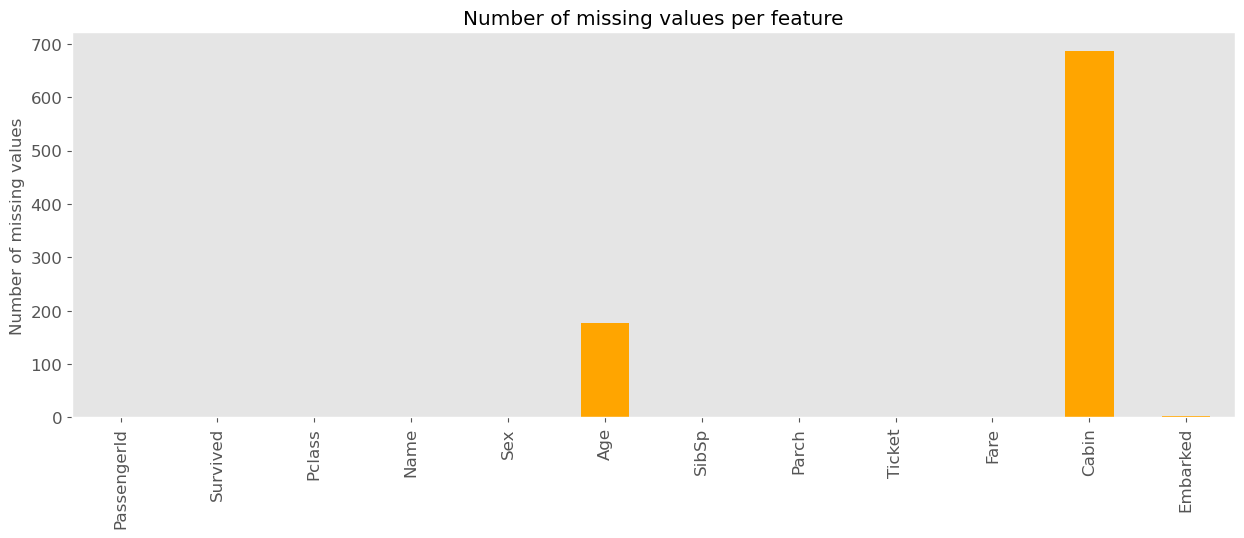

In [136]:
print(titanic_data.isna().sum())
print('---')
titanic_data.isna().sum().plot(kind='bar', figsize=(15,5), title='Number of missing values per feature', color='orange', fontsize=12, grid=False,ylabel='Number of missing values')
plt.show()


<h4 style="color:#0082fcff">7. Visualizing Categorical Distributions (Sex, Passenger Class, Embarked) with Pie Charts</h4>
<p>Creates a subplot with 3 pie charts side by side (<code>plt.subplots(1,3,figsize=(15,5)</code>):  
<p>1️⃣ Gender distribution (male vs female).  </p>
<p>2️⃣ Passenger class distribution (First, Second, Third).  </p>
<p>3️⃣ Port of embarkation distribution (Southampton, Cherbourg, Queenstown).  </p>
Each chart is styled with custom colors, percentages (<code>autopct</code>), text properties, and start angles for clarity.</p>

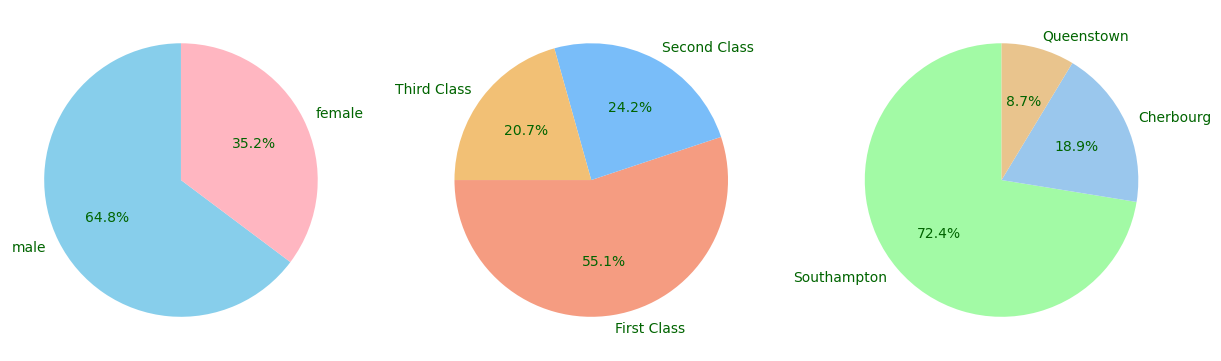

In [137]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
axes[0].pie(titanic_data['Sex'].value_counts(),labels=['male','female'],colors=['skyblue', 'lightpink'],autopct='%1.1f%%',  textprops={'fontsize': 10, 'color':'darkgreen'},startangle=90)
axes[1].pie(titanic_data['Pclass'].value_counts(),labels=['First Class','Second Class','Third Class'],colors=["#F59C81","#79BDF9","#F2C075"],autopct='%1.1f%%',  textprops={'fontsize': 10, 'color':'darkgreen'},startangle=900)
axes[2].pie(titanic_data['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstown'],colors=["#A2FAA5","#9AC7ED","#E9C48D"],autopct='%1.1f%%',textprops={'fontsize':10,'color':'darkgreen'},startangle=90)
plt.show()

<h4 style="color:#0082fcff">8. Handling Missing Values and Dropping Irrelevant Columns</h4>
<p>Fill missing Age with median, Embarked with mode, and drop Cabin column.</p>

In [138]:
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median())
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])
titanic_data.drop(columns=['Cabin'] ,axis=1,inplace=True)

<h4 style="color:#0082fcff">9. Checking Dataset Shape Missing Values Count and Previewing Rows</h4>
<p>Prints dataset dimensions, total missing values, and shows first rows.</p>

In [139]:
print(titanic_data.shape)
print('---------')
print(f"Number Of Missing Values : {titanic_data.isna().sum().sum()}")
titanic_data.head()


(891, 11)
---------
Number Of Missing Values : 0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<h4 style="color:#0082fcff">10. Displaying Value Counts for Sex and Embarked Columns</h4>
<p>Shows frequency distribution of passenger gender and embarkation ports.</p>

In [140]:
print(titanic_data['Sex'].value_counts())
print(titanic_data['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


<h4 style="color:#0082fcff">11. Encoding Categorical Variables (Sex and Embarked) into Numeric Values</h4>
<p>Maps Sex (male=0, female=1) and Embarked (S=0, C=1, Q=2).</p>

In [141]:
titanic_data['Sex']=titanic_data['Sex'].map({'male':0,"female":1})
titanic_data['Embarked']=titanic_data['Embarked'].map({'S':0,"C":1,'Q':2})

<h4 style="color:#0082fcff">12. Correlation Heatmap of Numerical Features</h4>
<p>Copies dataset, drops non-numeric columns, and plots a correlation heatmap using Seaborn.</p>

<Axes: >

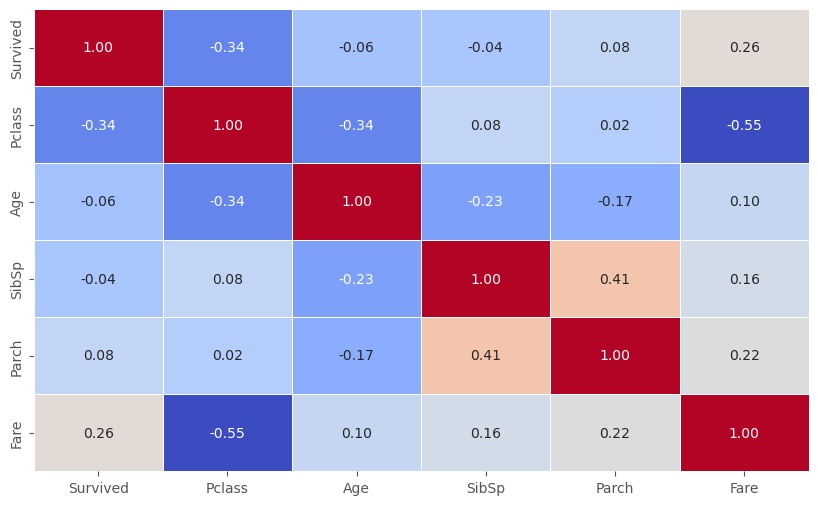

In [142]:
df=titanic_data.copy()
plt.figure(figsize=(10,6))
df.drop(columns=['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
sns.heatmap(df.corr(), annot=True,fmt='.2f', cmap='coolwarm', linewidths=0.5,cbar=False)

<h4 style="color:#0082fcff">13. Scatter Plots of Age vs Fare and Age vs Embarked Colored by Survival</h4>
<p>Creates two scatter plots to visualize survival patterns against Age with Fare and Embarked.</p>

<Axes: xlabel='Age', ylabel='Embarked'>

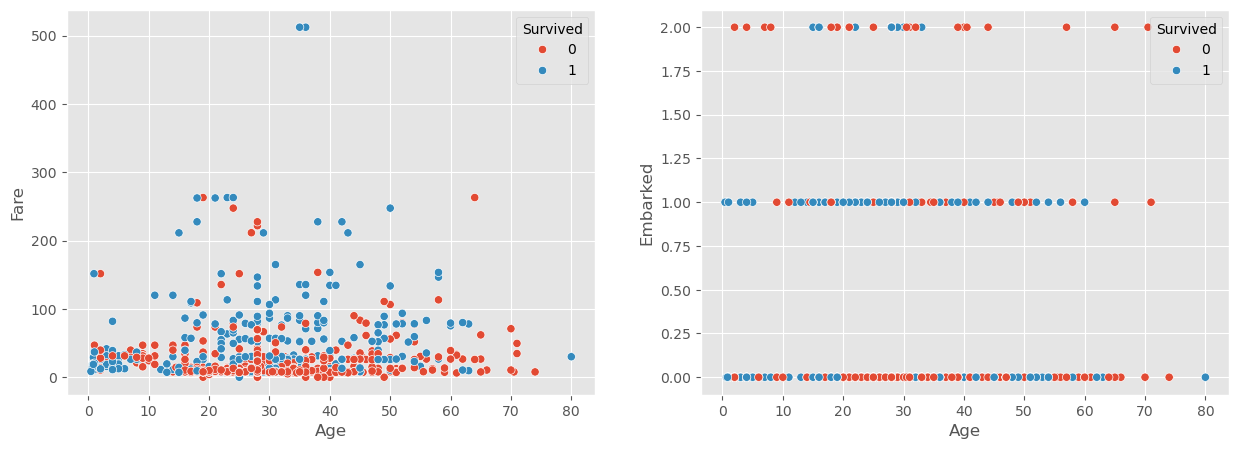

In [143]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=titanic_data, x='Age', y='Fare', hue='Survived',ax=axes[0])
sns.scatterplot(data=titanic_data, x='Age', y='Embarked', hue='Survived',ax=axes[1])

<h4 style="color:#0082fcff">14. Pairplot Visualization of Feature Relationships by Survival Status</h4>
<p>Plots pairwise relationships of dataset features with colors indicating survival.</p>

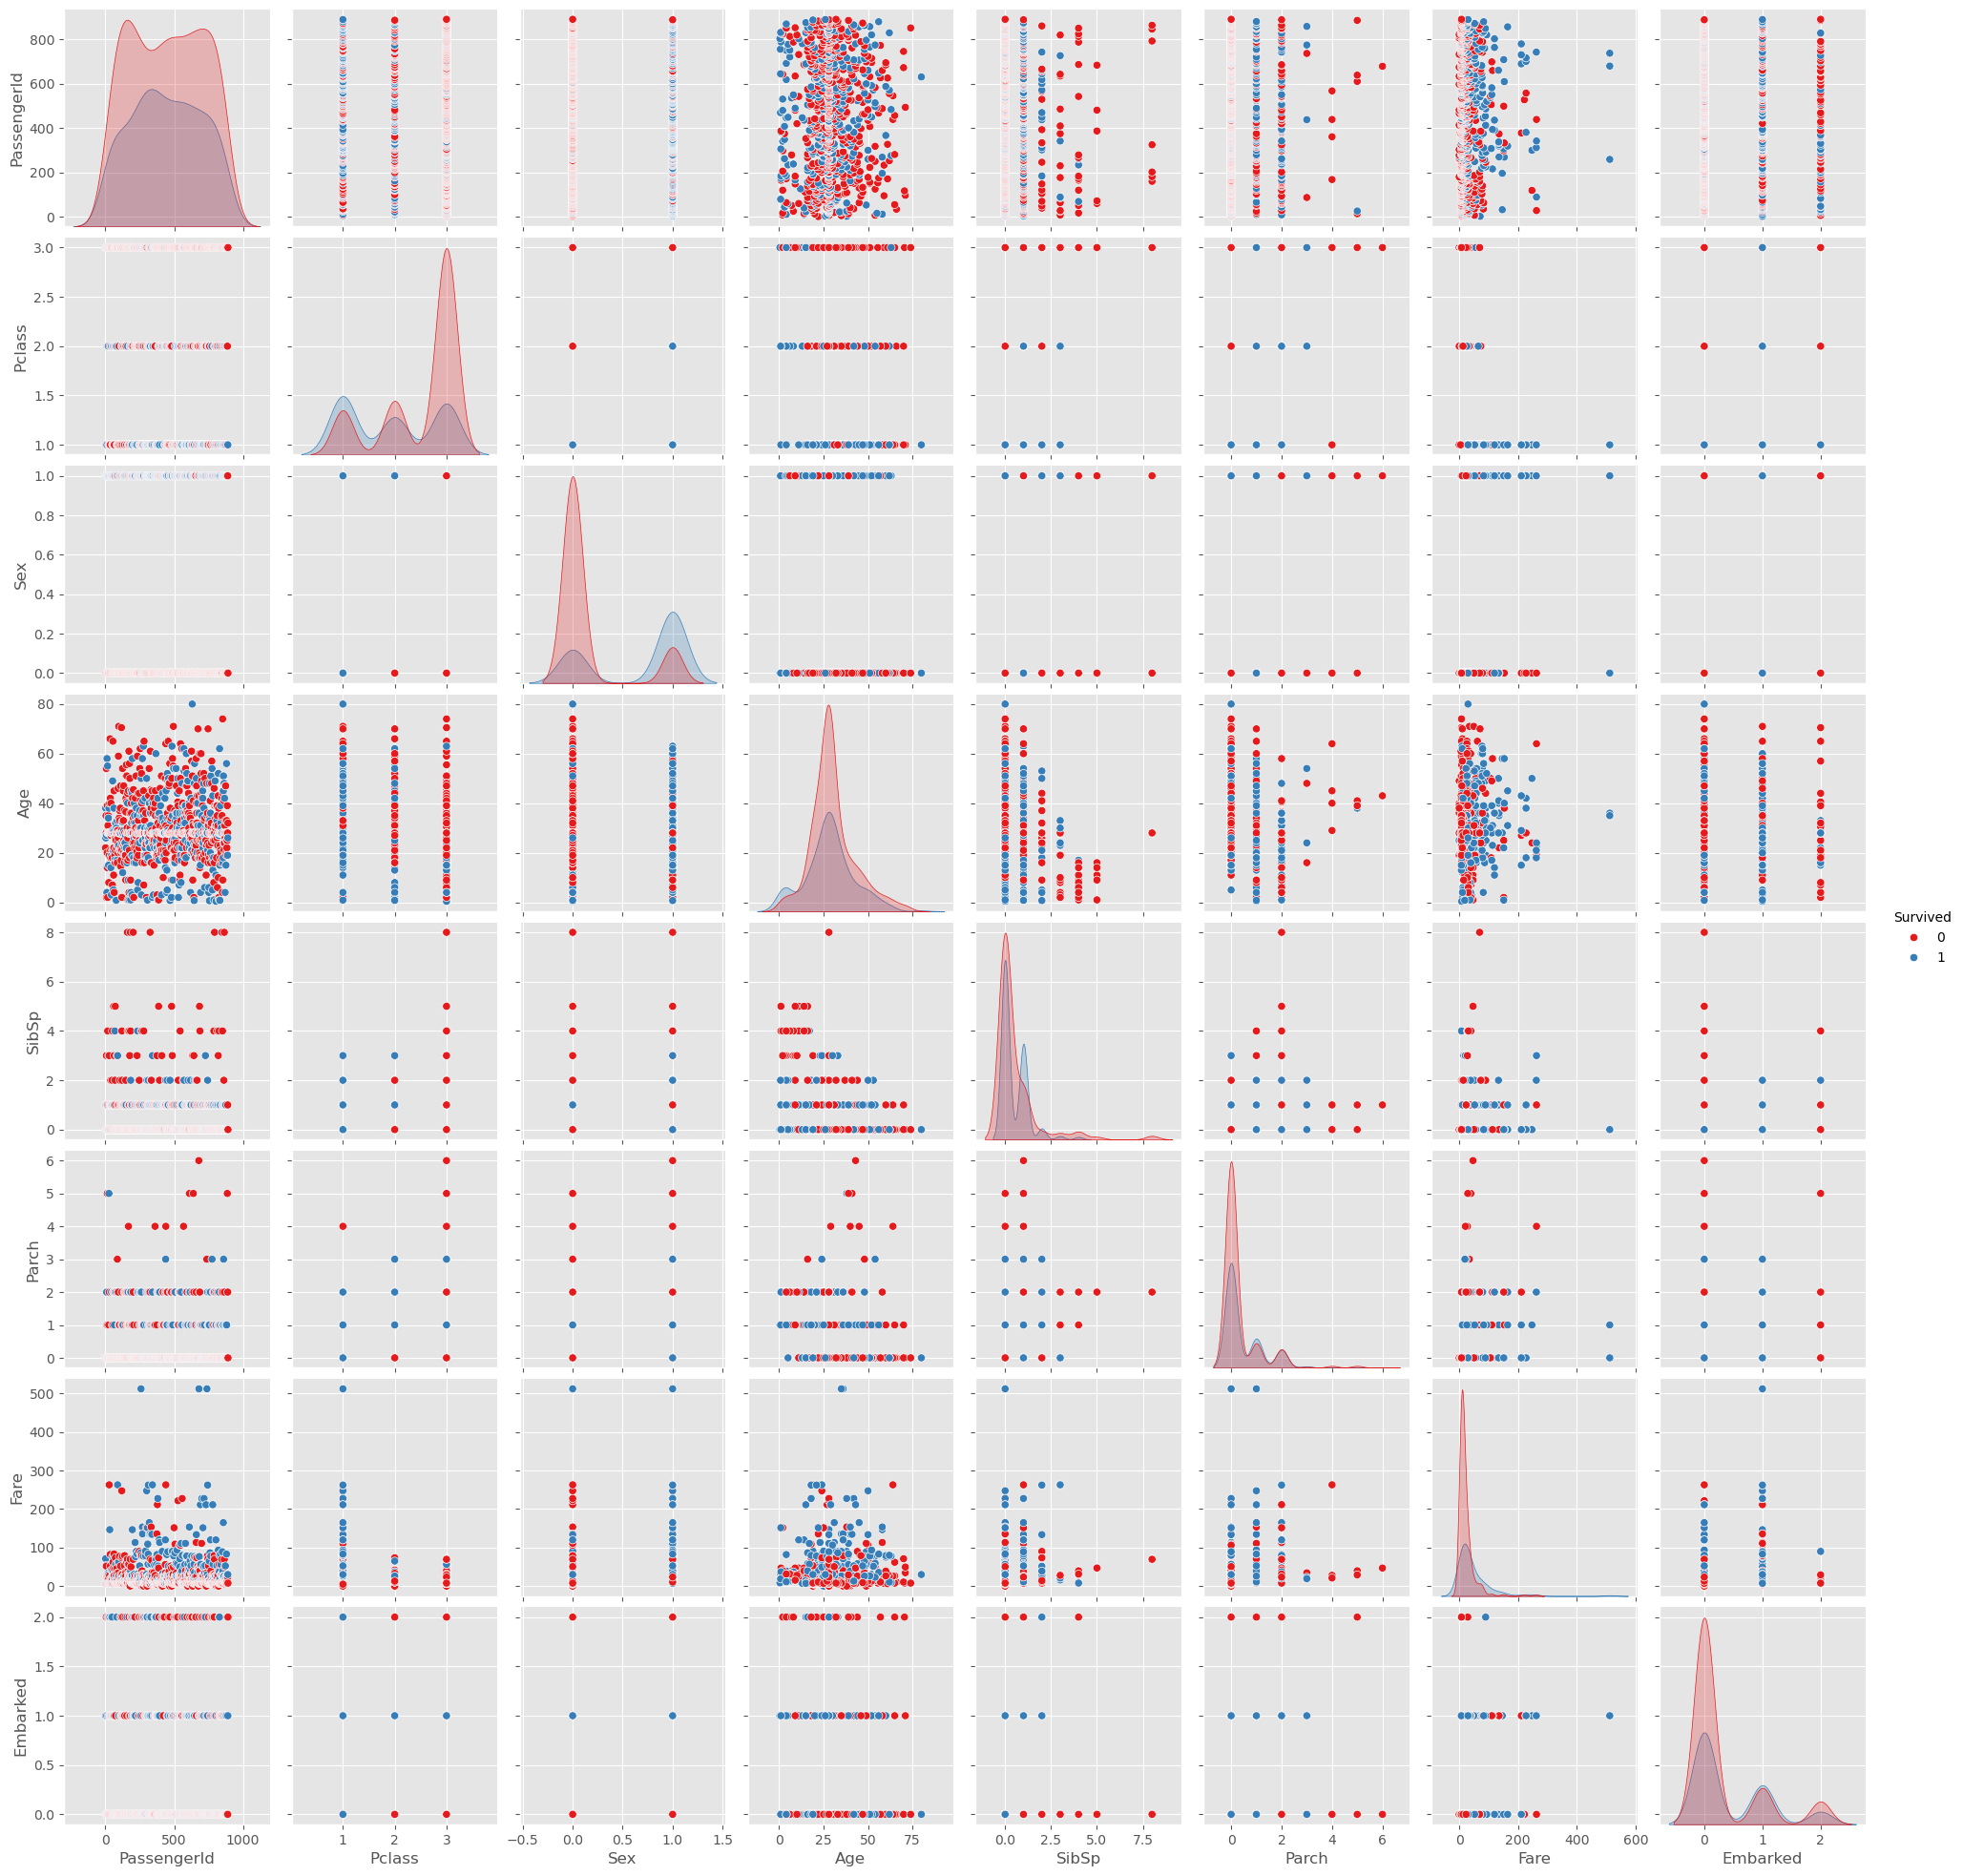

In [144]:
sns.pairplot(titanic_data, hue="Survived", palette="Set1")

<h4 style="color:#0082fcff">15. Splitting Dataset into Training and Testing Sets</h4>
<p>Drops unused columns, defines features (X) and target (Y), then splits data into train and test sets (80/20).</p>

In [145]:
X=titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_data['Survived']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
print(f"{X_train.shape}       {X_test.shape}")
print(f"{Y_train.shape}       {Y_test.shape}")

(712, 7)       (179, 7)
(712,)       (179,)


<h4 style="color:#0082fcff">16. Training Random Forest Classifier and Evaluating Accuracy</h4>
<p>Fits the Random Forest model on training data and prints accuracy score on the test set.</p>

In [146]:
Model=RandomForestClassifier()
Model.fit(X_train,Y_train)
acc=accuracy_score(Y_test,Model.predict(X_test))
print(f"The Acciracy Score is : {acc*100:.2f}%")

The Acciracy Score is : 81.01%


<h4 style="color:#0082fcff">17. Confusion Matrix Heatmap for Random Forest Predictions</h4>
<p>Computes the confusion matrix and visualizes it as a heatmap to evaluate classification performance.</p>

<Axes: >

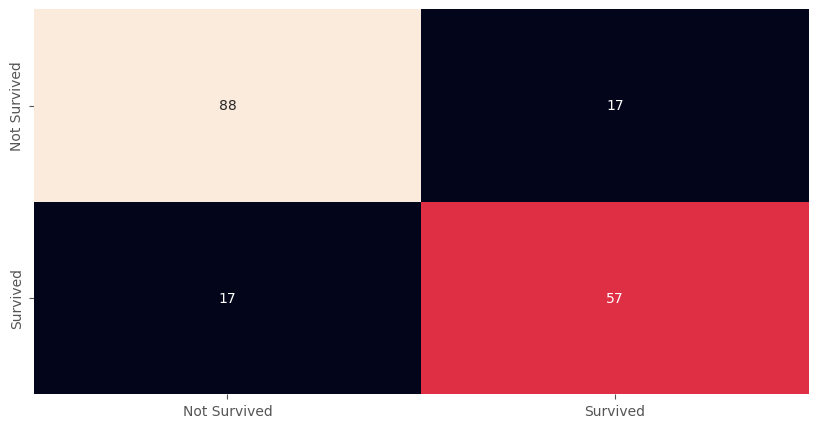

In [147]:
corr=confusion_matrix(Y_test,Model.predict(X_test))
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cbar=False,xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'],)

<h4 style="color:#0082fcff">18. Calculating the F1 Score of the Random Forest Model</h4>
<p>Evaluates the model’s balance between precision and recall using the F1 score metric.</p>

In [148]:
f1score=f1_score(Y_test,Model.predict(X_test))
print(f"The f1 Score is : {f1score}")

The f1 Score is : 0.7702702702702703


<h4 style="color:#0082fcff">19. Calculating the Recall Score of the Random Forest Model</h4>
<p>Computes the recall metric to measure how well the model identifies actual survivors.</p>


In [149]:
recallScore=recall_score(Y_test,Model.predict(X_test))
print(f"The recall score is : {recallScore}")

The recall score is : 0.7702702702702703
